In [2]:
import os 
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.chdir('C:\\Users\\rhian\\Downloads\\CYPLAN 255\\AP-Exams\\Data')
os.getcwd()

'C:\\Users\\rhian\\Downloads\\CYPLAN 255\\AP-Exams\\Data'

In [4]:
ap_features = pd.read_csv('AP_Student_Features.csv')
ap_features

,ncessch,year,sex,race,leaid,students_AP_exam_none,students_AP_pass_none,students_AP_exam_oneormore,students_AP_pass_oneormore,enrollment_crdc,enrl_IB,enrl_AP,enrl_AP_science,enrl_AP_math,enrl_AP_other,enrl_AP_language,enrl_gifted_talented,students_SAT_ACT,students_chronically_absent,students_disc_harass_dis,students_disc_harass_race,students_disc_harass_sex,students_report_harass_dis,students_report_harass_race,students_report_harass_sex,students_susp_in_sch,students_susp_out_sch_single,students_susp_out_sch_multiple,expulsions_no_ed_serv,expulsions_with_ed_serv,expulsions_zero_tolerance,students_arrested,students_referred_law_enforce,transfers_alt_sch_disc,AP_oneormore_Present,AP_none_Present
0,40032402160.0000,2011,1,1,400324.0000,NaN,NaN,NaN,NaN,26.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0,0
1,40032402160.0000,2011,1,2,400324.0000,NaN,NaN,NaN,NaN,44.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0,0
2,40032402160.0000,2011,1,3,400324.0000,NaN,NaN,NaN,NaN,59.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0,0
3,40032402160.0000,2011,1,4,400324.0000,NaN,NaN,NaN,NaN,20.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0,0
4,40032402160.0000,2011,1,5,400324.0000,NaN,NaN,NaN,NaN,17.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937939,390059405085.0000,2015,99,4,3900594.0000,NaN,NaN,NaN,NaN,4.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0
937940,390059405085.0000,2015,99,5,3900594.0000,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0
937941,390059405085.0000,2015,99,6,3900594.0000,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0
937942,390059405085.0000,2015,99,7,3900594.0000,NaN,NaN,NaN,NaN,7.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0


KeyboardInterrupt: 

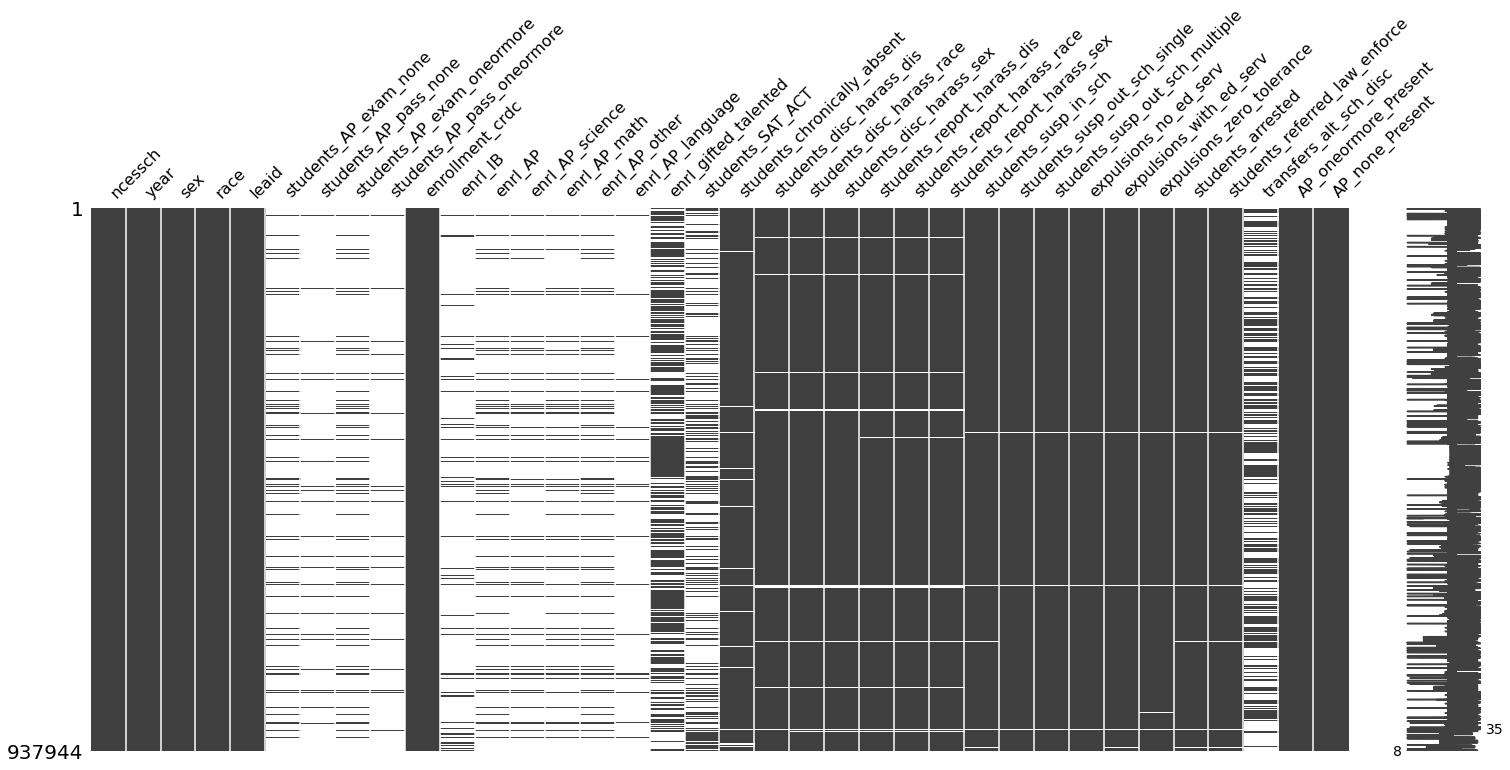

In [5]:
msno.matrix(ap_features)

In [ ]:
ap_features['AP_oneormore_AP_rate'] = ap_features['students_AP_exam_oneormore'] / ap_features['enrl_AP']
ap_features['AP_onemore_rate_logged'] = np.log(ap_features['AP_oneormore_AP_rate'])
ap_features['AP_onemore_rate_squared'] = ap_features['AP_oneormore_AP_rate']**2

In [6]:
ap_rates = ap_features.copy()
ap_rates[['students_AP_exam_none', 'students_AP_pass_none',
       'students_AP_exam_oneormore', 'students_AP_pass_oneormore', 'enrl_IB',
       'enrl_AP', 'enrl_AP_science', 'enrl_AP_math', 'enrl_AP_other',
       'enrl_AP_language', 'enrl_gifted_talented', 'students_SAT_ACT',
       'students_chronically_absent', 'students_disc_harass_dis',
       'students_disc_harass_race', 'students_disc_harass_sex',
       'students_report_harass_dis', 'students_report_harass_race',
       'students_report_harass_sex', 'students_susp_in_sch',
       'students_susp_out_sch_single', 'students_susp_out_sch_multiple',
       'expulsions_no_ed_serv', 'expulsions_with_ed_serv',
       'expulsions_zero_tolerance', 'students_arrested',
       'students_referred_law_enforce', 'transfers_alt_sch_disc']] = \
ap_features[['students_AP_exam_none', 'students_AP_pass_none',
       'students_AP_exam_oneormore', 'students_AP_pass_oneormore', 'enrl_IB',
       'enrl_AP', 'enrl_AP_science', 'enrl_AP_math', 'enrl_AP_other',
       'enrl_AP_language', 'enrl_gifted_talented', 'students_SAT_ACT',
       'students_chronically_absent', 'students_disc_harass_dis',
       'students_disc_harass_race', 'students_disc_harass_sex',
       'students_report_harass_dis', 'students_report_harass_race',
       'students_report_harass_sex', 'students_susp_in_sch',
       'students_susp_out_sch_single', 'students_susp_out_sch_multiple',
       'expulsions_no_ed_serv', 'expulsions_with_ed_serv',
       'expulsions_zero_tolerance', 'students_arrested',
       'students_referred_law_enforce', 'transfers_alt_sch_disc']].div(ap_features.enrollment_crdc, axis=0)

ap_rates[ap_rates['students_AP_exam_oneormore'] > 0]

,ncessch,year,sex,race,leaid,students_AP_exam_none,students_AP_pass_none,students_AP_exam_oneormore,students_AP_pass_oneormore,enrollment_crdc,enrl_IB,enrl_AP,enrl_AP_science,enrl_AP_math,enrl_AP_other,enrl_AP_language,enrl_gifted_talented,students_SAT_ACT,students_chronically_absent,students_disc_harass_dis,students_disc_harass_race,students_disc_harass_sex,students_report_harass_dis,students_report_harass_race,students_report_harass_sex,students_susp_in_sch,students_susp_out_sch_single,students_susp_out_sch_multiple,expulsions_no_ed_serv,expulsions_with_ed_serv,expulsions_zero_tolerance,students_arrested,students_referred_law_enforce,transfers_alt_sch_disc,AP_oneormore_Present,AP_none_Present
48,60000103278.0000,2011,1,1,600001.0000,0.2159,0.0227,0.0909,0.0625,176.0000,0.0000,0.2670,0.0625,0.0284,0.0455,0.0114,NaN,0.0455,0.0795,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1080,0.0625,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,1,1
50,60000103278.0000,2011,1,3,600001.0000,0.0260,NaN,0.0519,NaN,77.0000,0.0000,0.1039,0.0260,0.0000,0.0260,0.0260,NaN,0.0260,0.0260,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1039,0.0649,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,1,1
55,60000103278.0000,2011,1,99,600001.0000,0.1498,0.0150,0.0749,0.0412,267.0000,0.0000,0.2210,0.0562,0.0187,0.0449,0.0150,NaN,0.0375,0.0674,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1086,0.0599,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,1,1
56,60000103278.0000,2011,2,1,600001.0000,0.2733,0.0248,0.0870,0.0683,161.0000,0.0000,0.3478,0.1429,0.0311,0.0683,0.0124,NaN,0.0497,0.1242,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0311,0.0311,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,1,1
58,60000103278.0000,2011,2,3,600001.0000,0.0735,NaN,0.0588,0.0147,68.0000,0.0000,0.1618,0.0294,0.0000,0.0735,0.0735,NaN,0.0735,0.0294,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0735,0.0294,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937711,69113710339.0000,2017,1,99,691137.0000,0.0000,NaN,0.0435,NaN,23.0000,NaN,0.0435,NaN,0.0435,NaN,NaN,NaN,0.3043,0.1739,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0435,0.0000,0.0435,0.0435,0.0000,0.0435,0.0000,1,1
937712,69113710339.0000,2017,2,1,691137.0000,0.0000,NaN,0.0769,NaN,13.0000,NaN,0.0769,NaN,0.0769,NaN,NaN,NaN,0.2308,0.3846,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1538,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1,1
937719,69113710339.0000,2017,2,99,691137.0000,0.0000,NaN,0.0556,NaN,18.0000,NaN,0.0556,NaN,0.0556,NaN,NaN,NaN,0.2222,0.3889,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1111,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1,1
937720,69113710339.0000,2017,99,1,691137.0000,0.0000,NaN,0.0690,NaN,29.0000,NaN,0.0690,NaN,0.0690,NaN,NaN,NaN,0.3103,0.2414,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0690,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1,1


# Investigate availability bias 

### Does correlation drop all rows with NaN? --NO 

In [76]:
ap_numfeat = ap_rates.drop(['ncessch', 'leaid'], axis=1)
ap_numfeat

,year,sex,race,students_AP_exam_none,students_AP_pass_none,students_AP_exam_oneormore,students_AP_pass_oneormore,enrollment_crdc,enrl_IB,enrl_AP,enrl_AP_science,enrl_AP_math,enrl_AP_other,enrl_AP_language,enrl_gifted_talented,students_SAT_ACT,students_chronically_absent,students_disc_harass_dis,students_disc_harass_race,students_disc_harass_sex,students_report_harass_dis,students_report_harass_race,students_report_harass_sex,students_susp_in_sch,students_susp_out_sch_single,students_susp_out_sch_multiple,expulsions_no_ed_serv,expulsions_with_ed_serv,expulsions_zero_tolerance,students_arrested,students_referred_law_enforce,transfers_alt_sch_disc,AP_oneormore_Present,AP_none_Present,AP_oneormore_AP_rate,AP_oneormore_logged,AP_oneormore_squared
0,2011,1,1,NaN,NaN,NaN,NaN,26.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0,0,NaN,NaN,NaN
1,2011,1,2,NaN,NaN,NaN,NaN,44.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0,0,NaN,NaN,NaN
2,2011,1,3,NaN,NaN,NaN,NaN,59.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0,0,NaN,NaN,NaN
3,2011,1,4,NaN,NaN,NaN,NaN,20.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0,0,NaN,NaN,NaN
4,2011,1,5,NaN,NaN,NaN,NaN,17.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937939,2015,99,4,NaN,NaN,NaN,NaN,4.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,NaN,NaN,NaN
937940,2015,99,5,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
937941,2015,99,6,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
937942,2015,99,7,NaN,NaN,NaN,NaN,7.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,NaN,NaN,NaN


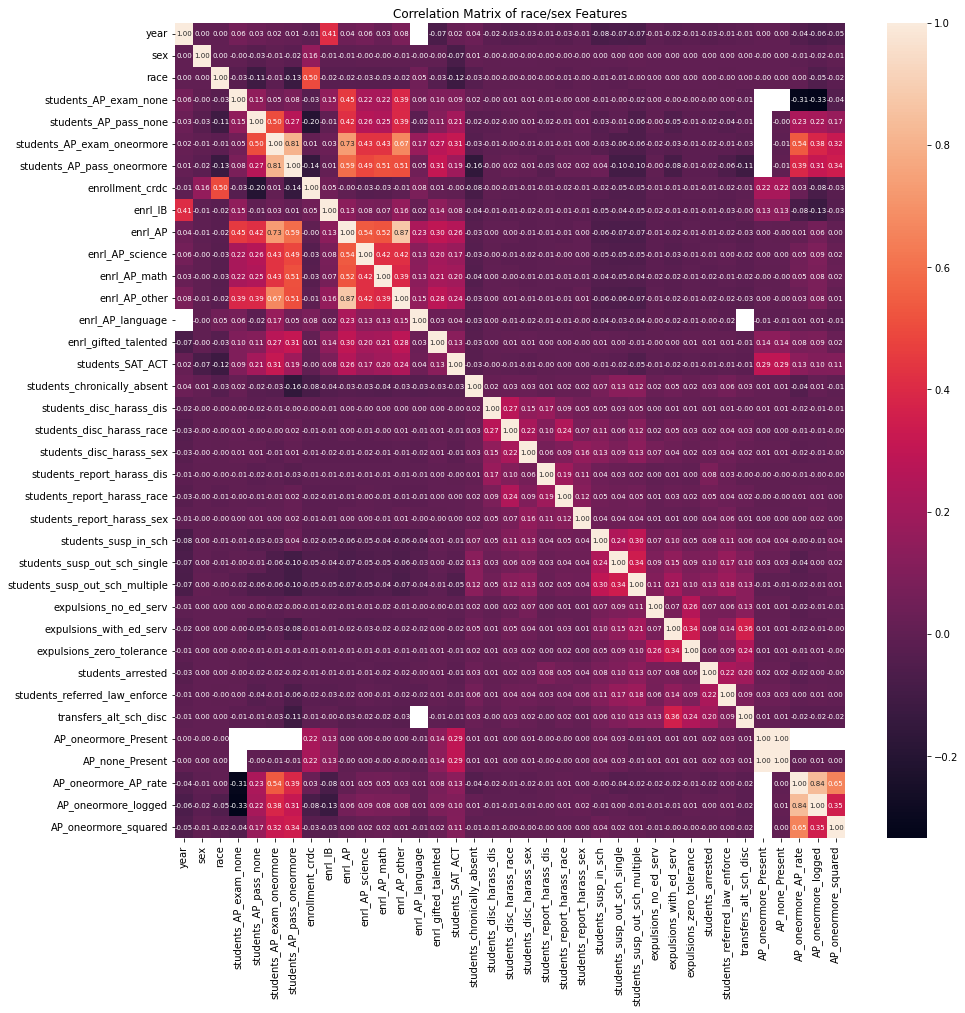

In [77]:
fig, ax = plt.subplots(figsize=(15,15)) 
correlation_mat = ap_numfeat.corr()
sns.heatmap(correlation_mat, annot = True, ax=ax, annot_kws={"fontsize":7}, fmt='.2f')
plt.title("Correlation Matrix of race/sex Features") 
plt.show()

Schools who reported their AP taken data are more likely to: 
- higher rates of SAT_ACT student particpation 
- larger school enrollment / population 
- higher rates of gifted talented enrollment 
- higher rates of IB program enrollment 

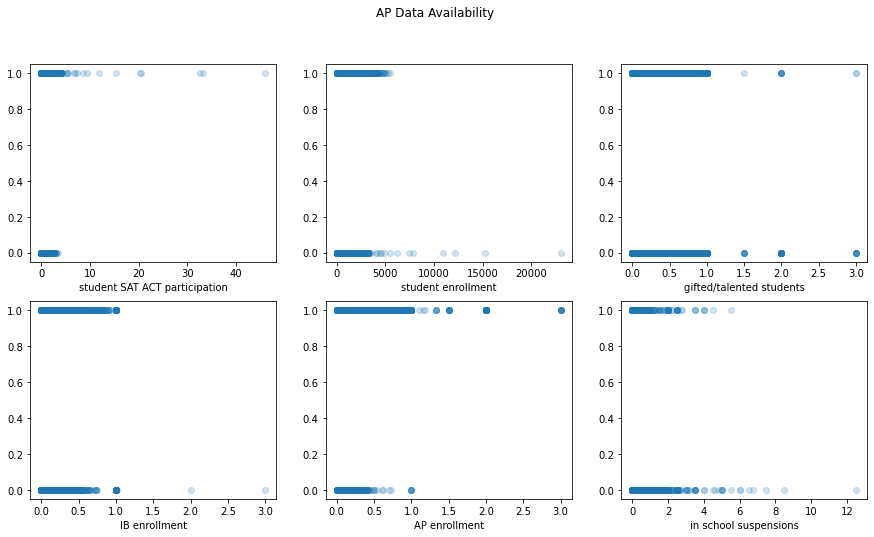

In [15]:
fig,ax = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle("AP Data Availability")

ax[0,0].scatter(ap_rates['students_SAT_ACT'], ap_rates['AP_oneormore_Present'], alpha=0.2)
ax[0,0].set_xlabel("student SAT ACT participation")

ax[0,1].scatter(ap_rates['enrollment_crdc'], ap_rates['AP_oneormore_Present'], alpha=0.2)
ax[0,1].set_xlabel("student enrollment")

ax[0,2].scatter(ap_rates['enrl_gifted_talented'], ap_rates['AP_oneormore_Present'], alpha=0.2)
ax[0,2].set_xlabel("gifted/talented students")

ax[1,0].scatter(ap_rates['enrl_IB'], ap_rates['AP_oneormore_Present'], alpha=0.2)
ax[1,0].set_xlabel("IB enrollment")

ax[1,1].scatter(ap_rates['enrl_AP'], ap_rates['AP_oneormore_Present'], alpha=0.2)
ax[1,1].set_xlabel("AP enrollment")

ax[1,2].scatter(ap_rates['students_susp_in_sch'], ap_rates['AP_oneormore_Present'], alpha=0.2)
ax[1,2].set_xlabel("in school suspensions");


# Condense df columns using acc to available AP data 

In [106]:
ap_rates_full = ap_rates[ap_rates['students_AP_exam_oneormore'].notna()]
ap_rates_full = ap_rates_full.drop(['AP_oneormore_Present', 'AP_none_Present'], axis=1)
ap_rates_full

,ncessch,year,sex,race,leaid,students_AP_exam_none,students_AP_pass_none,students_AP_exam_oneormore,students_AP_pass_oneormore,enrollment_crdc,enrl_IB,enrl_AP,enrl_AP_science,enrl_AP_math,enrl_AP_other,enrl_AP_language,enrl_gifted_talented,students_SAT_ACT,students_chronically_absent,students_disc_harass_dis,students_disc_harass_race,students_disc_harass_sex,students_report_harass_dis,students_report_harass_race,students_report_harass_sex,students_susp_in_sch,students_susp_out_sch_single,students_susp_out_sch_multiple,expulsions_no_ed_serv,expulsions_with_ed_serv,expulsions_zero_tolerance,students_arrested,students_referred_law_enforce,transfers_alt_sch_disc,AP_oneormore_AP_rate,AP_oneormore_logged,AP_oneormore_squared
48,60000103278.0000,2011,1,1,600001.0000,0.2159,0.0227,0.0909,0.0625,176.0000,0.0000,0.2670,0.0625,0.0284,0.0455,0.0114,NaN,0.0455,0.0795,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1080,0.0625,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0.3404,-1.0776,0.1159
49,60000103278.0000,2011,1,2,600001.0000,0.0000,NaN,0.0000,NaN,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,NaN,NaN,NaN
50,60000103278.0000,2011,1,3,600001.0000,0.0260,NaN,0.0519,NaN,77.0000,0.0000,0.1039,0.0260,0.0000,0.0260,0.0260,NaN,0.0260,0.0260,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1039,0.0649,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0.5000,-0.6931,0.2500
51,60000103278.0000,2011,1,4,600001.0000,0.0000,NaN,0.0000,NaN,5.0000,0.0000,0.4000,0.4000,0.0000,0.0000,0.0000,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0.0000,-inf,0.0000
52,60000103278.0000,2011,1,5,600001.0000,0.0000,NaN,0.0000,NaN,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937720,69113710339.0000,2017,99,1,691137.0000,0.0000,NaN,0.0690,NaN,29.0000,NaN,0.0690,NaN,0.0690,NaN,NaN,NaN,0.3103,0.2414,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0690,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000
937722,69113710339.0000,2017,99,3,691137.0000,0.0000,NaN,0.0000,NaN,7.0000,NaN,0.0000,NaN,0.0000,NaN,NaN,NaN,0.1429,0.2857,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1429,0.0000,0.1429,0.1429,0.0000,0.1429,0.0000,NaN,NaN,NaN
937724,69113710339.0000,2017,99,5,691137.0000,0.0000,NaN,0.0000,NaN,1.0000,NaN,0.0000,NaN,0.0000,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,NaN,NaN
937726,69113710339.0000,2017,99,7,691137.0000,0.0000,NaN,0.0000,NaN,4.0000,NaN,0.0000,NaN,0.0000,NaN,NaN,NaN,0.2500,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,NaN,NaN


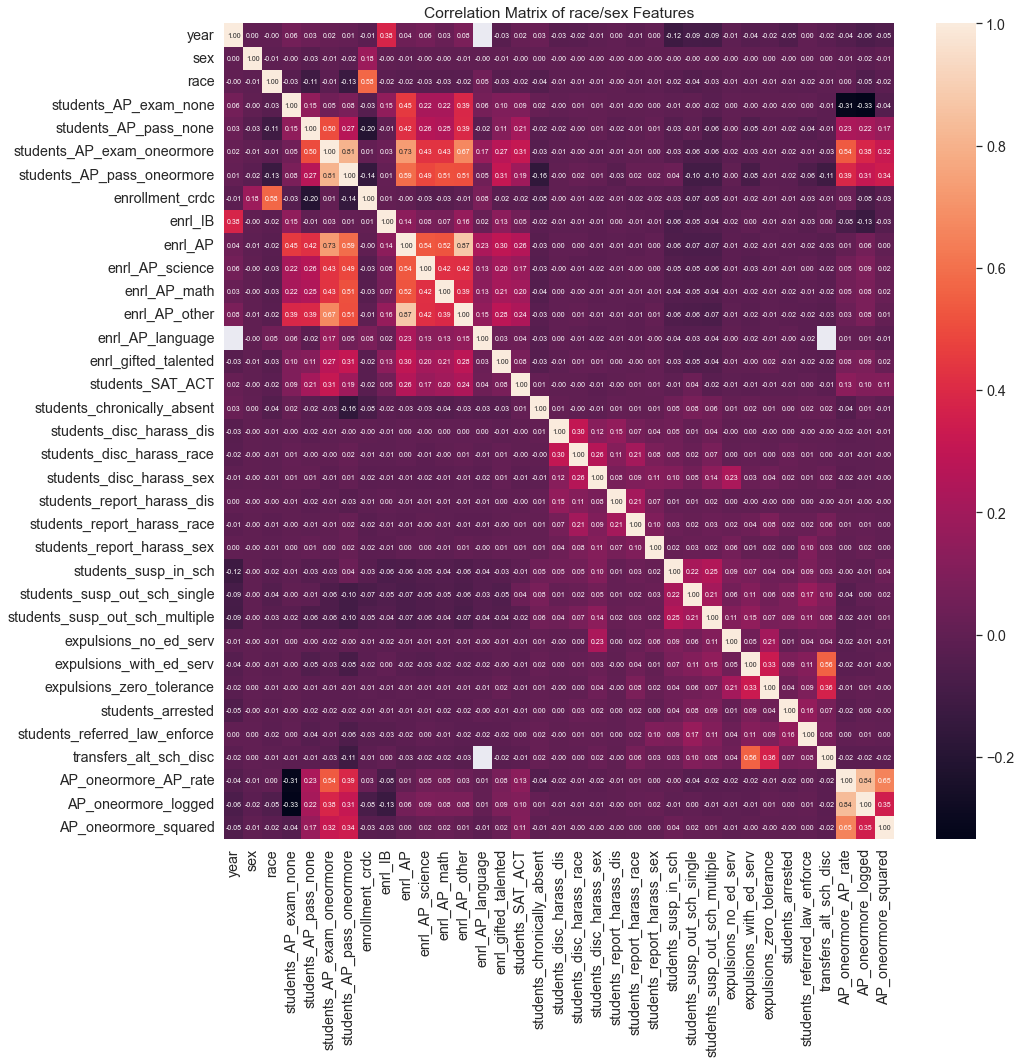

In [107]:
fig, ax = plt.subplots(figsize=(15,15)) 
correlation_mat = ap_rates_full.drop(['ncessch', 'leaid'], axis=1).corr()
sns.heatmap(correlation_mat, annot = True, ax=ax, annot_kws={"fontsize":7}, fmt='.2f')
plt.title("Correlation Matrix of race/sex Features") 
plt.show()

In [36]:
# condense our df 
ap_feat = ap_features[['ncessch', 'leaid', 
                       'year', 'race', 'sex', 'students_AP_exam_none', 
                       'students_AP_exam_oneormore', 
                       'enrl_AP', 'enrl_AP_science', 'enrl_AP_math', 'enrl_AP_other',
                       'enrl_gifted_talented',
                       'students_chronically_absent', 
                       'students_susp_out_sch_single', 
                       'students_referred_law_enforce', 'enrollment_crdc', 
                       'students_report_harass_sex',
                       'students_SAT_ACT', 'AP_oneormore_Present', 'AP_none_Present']] 
ap_feat 

,ncessch,leaid,year,race,sex,students_AP_exam_none,students_AP_exam_oneormore,enrl_AP,enrl_AP_science,enrl_AP_math,enrl_AP_other,enrl_gifted_talented,students_chronically_absent,students_susp_out_sch_single,students_referred_law_enforce,enrollment_crdc,students_report_harass_sex,students_SAT_ACT,AP_oneormore_Present,AP_none_Present
0,4.003240e+10,400324.0,2011,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,26.0,0.0,0.0,0,0
1,4.003240e+10,400324.0,2011,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,26.0,0.0,0.0,0,0
2,4.003240e+10,400324.0,2011,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,26.0,0.0,0.0,0,0
3,4.003240e+10,400324.0,2011,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,44.0,0.0,0.0,0,0
4,4.003240e+10,400324.0,2011,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,44.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6433626,6.057301e+10,605730.0,2017,7,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,5.0,0.0,0.0,0,0
6433627,6.057301e+10,605730.0,2017,99,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,58.0,0.0,0.0,0,0
6433628,6.057301e+10,605730.0,2017,99,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,58.0,0.0,0.0,0,0
6433629,6.057301e+10,605730.0,2017,99,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,58.0,0.0,0.0,0,0
